In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

INPUT = '/scratch/users/k21075402/new'
harvest = {
    'name': 'commons_harvest__open',
    'trial_id': '30ca9764'
}

In [9]:
environment = harvest

df = pd.read_json(os.path.join(INPUT, environment['name'], environment['trial_id'], 'results.json'), lines=True)
df['reward'] = df.episode_reward.apply(lambda x: np.mean(x))
df = df[['reward', 'training_iteration']]
df['run'] = df.index // 500
df

,reward,training_iteration,run
0,286.300000,1,0
1,278.733333,2,0
2,276.200000,3,0
3,291.233333,4,0
4,294.633333,5,0
...,...,...,...
1962,494.466667,463,3
1963,492.833333,464,3
1964,473.800000,465,3
1965,490.233333,466,3


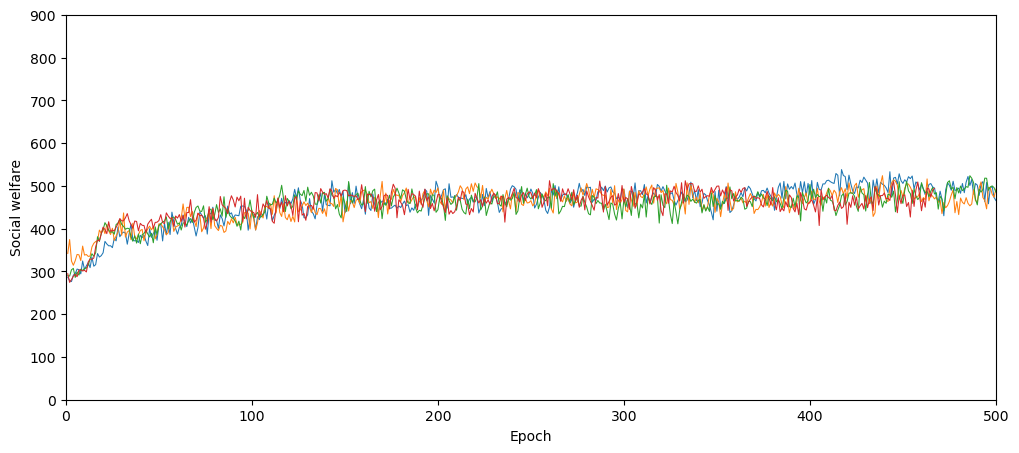

In [13]:
grouped = df.groupby('run')

# Plot each group
fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')
for run, group in grouped:
    group.plot(x='training_iteration', y='reward', ax=ax, label=run, legend=False, lw=0.75)

ax.set_xlabel('Epoch')
ax.set_ylabel('Social welfare')
ax.set_xlim(0, 500)
ax.set_ylim(0, 900)
# ax.set_xticks(np.arange(0, 2101, 300))
# ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
# ax.xaxis.grid(True, color='grey', linestyle='--', alpha=0.5)

fig.savefig(f'scratch_{environment["name"]}', dpi=300, bbox_inches='tight')

In [5]:
# split by the rows: 0:499,500:999 and so on
df

,reward,training_iteration
0,286.300000,1
1,278.733333,2
2,276.200000,3
3,291.233333,4
4,294.633333,5
...,...,...
1962,494.466667,463
1963,492.833333,464
1964,473.800000,465
1965,490.233333,466
